In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
from difflib import SequenceMatcher

# Import our input dataset
org_df = pd.read_csv('charity_data.csv')
org_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Finding data type for all columns
org_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Generate our categorical variable list
org_cat = org_df.dtypes[org_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
org_df[org_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [6]:
# Data frame alphabetically sorted by column NAME
org_df_s = org_df.sort_values('NAME')
org_df_s

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,T3,Independent,C2000,Preservation,Trust,1,0,N,5000,1
11700,421590355,100 BLACK MEN OF AMERICA,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,139359,1
22565,621456812,100 BLACK MEN OF MEMPHIS INC,T3,Independent,C1000,Preservation,Trust,1,1-9999,N,5000,1
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,128174,0
23675,680381750,1150 WEBSTER STREET INC,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,7636103,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,T3,Independent,C1400,Preservation,Trust,1,100000-499999,N,119033,1
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,T3,Independent,C1000,Preservation,Trust,1,1-9999,N,5000,1
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,441815,0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1


In [7]:
# Creating a new "numeric Name" column. Unique names are assigned with unique numbers

lasthash = hash(org_df_s.iloc[0]['NAME']) & 0xffffff
hash_name = [lasthash]

for x in range (0, len(org_df_s)-1) :
    similarity = SequenceMatcher(None, org_df_s.iloc[x]['NAME'], org_df_s.iloc[x+1]['NAME']).ratio()
    if similarity < 0.8 :
        lasthash = hash(org_df_s.iloc[x+1]['NAME']) & 0xffffff
    hash_name.append(lasthash)
org_df_s['hash_name'] = hash_name

In [8]:
# As the result we have column "numeric_name" with 19025 unique numeric_names (with above code similar names converted to one clean number name) 
org_df_s

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,hash_name
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,T3,Independent,C2000,Preservation,Trust,1,0,N,5000,1,1659512
11700,421590355,100 BLACK MEN OF AMERICA,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,139359,1,7547500
22565,621456812,100 BLACK MEN OF MEMPHIS INC,T3,Independent,C1000,Preservation,Trust,1,1-9999,N,5000,1,7547500
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,128174,0,15293747
23675,680381750,1150 WEBSTER STREET INC,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,7636103,0,12460089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,T3,Independent,C1400,Preservation,Trust,1,100000-499999,N,119033,1,13355166
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,T3,Independent,C1000,Preservation,Trust,1,1-9999,N,5000,1,5844529
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,441815,0,8522290
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1,3429548


In [9]:
# Exploring  companies started with AMATEUR name
org_df_s.iloc[1375:1400]

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,hash_name
25718,752600092,AMARILLO HOCKEY ASSOCIATION INC,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,103232,0,12122632
28840,813687130,AMARILLO YCCO,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1,3726450
31463,900982627,AMATEUR ATHELTIC UNION OF THE UNITED STATES INC,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,0,13209047
29064,816014368,AMATEUR ATHLETIC UNION OF THE U S INC,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,0,13209047
18909,474017412,AMATEUR ATHLETIC UNION OF THE UNITED STATE INC,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,0,13209047
22487,621038274,AMATEUR ATHLETIC UNION OF THE UNITED STATES,T3,CompanySponsored,C1200,Preservation,Trust,1,100000-499999,N,127134,0,13209047
18245,472535764,AMATEUR ATHLETIC UNION OF THE UNITED STATES,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,0,13209047
17795,471747664,AMATEUR ATHLETIC UNION OF THE UNITED STATES,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,0,13209047
15630,462967306,AMATEUR ATHLETIC UNION OF THE UNITED STATES,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,0,13209047
17796,471751278,AMATEUR ATHLETIC UNION OF THE UNITED STATES,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,0,13209047


In [10]:
# Check the unique value counts for EIN. All rows have unique EIN.
org_df.EIN.value_counts()

471361061    1
716145914    1
470850777    1
742622426    1
436124893    1
            ..
205040320    1
461149136    1
474460867    1
204833477    1
352260098    1
Name: EIN, Length: 34299, dtype: int64

In [11]:
# Check the unique value counts to see if binning is required for APPLICATION_TYPE
appl_type = org_df.APPLICATION_TYPE.value_counts()
appl_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

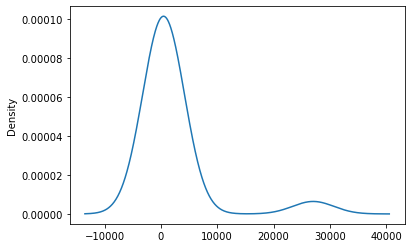

In [12]:
# Visualize the value counts - Most comon unique values 
appl_type.plot.density()

In [13]:
# Determine which values to replace
replace_appl_type = list(appl_type[appl_type < 500].index)

# Replace in DataFrame
for appl_type in replace_appl_type:
    org_df.APPLICATION_TYPE = org_df.APPLICATION_TYPE.replace(appl_type,"Other")


# Check to make sure binning was successful
org_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame for APPLICATION_TYPE. (9 columns)
encode_df1 = pd.DataFrame(enc.fit_transform(org_df.APPLICATION_TYPE.values.reshape(-1,1)))

# Rename encoded columns
encode_df1.columns = enc.get_feature_names(['APPL_TYPE'])
encode_df1

,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# Merge the two DataFrames together and drop the APPLICATION_TYPE column (20 columns)
org_df1 = org_df_s.merge(encode_df1,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)
org_df1

,EIN,NAME,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,...,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,Independent,C2000,Preservation,Trust,1,0,N,5000,...,1659512,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,Independent,C1200,Preservation,Trust,1,25000-99999,N,139359,...,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,Independent,C1000,Preservation,Trust,1,1-9999,N,5000,...,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,Independent,C1000,Preservation,Trust,1,100000-499999,N,128174,...,15293747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23675,680381750,1150 WEBSTER STREET INC,Independent,C1000,Preservation,Trust,1,100000-499999,N,7636103,...,12460089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,Independent,C1400,Preservation,Trust,1,100000-499999,N,119033,...,13355166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,Independent,C1000,Preservation,Trust,1,1-9999,N,5000,...,5844529,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,Independent,C1000,Preservation,Trust,1,1M-5M,N,441815,...,8522290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,Independent,C1000,Preservation,Trust,1,0,N,5000,...,3429548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Check the unique value counts to see if binning is required
org_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [17]:
# New dictionary for AFFILIATION column
affiliation = {"Independent": "1", "CompanySponsored":"2", "Family/Parent":"3", "National":"3", "Regional":"3", "Other":"3"}

In [18]:
# Replacing values with dictionary
org_df2 = org_df1.replace({"AFFILIATION": affiliation})
org_df2

,EIN,NAME,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,...,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,1,C2000,Preservation,Trust,1,0,N,5000,...,1659512,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,1,C1200,Preservation,Trust,1,25000-99999,N,139359,...,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,1,C1000,Preservation,Trust,1,1-9999,N,5000,...,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,1,C1000,Preservation,Trust,1,100000-499999,N,128174,...,15293747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23675,680381750,1150 WEBSTER STREET INC,1,C1000,Preservation,Trust,1,100000-499999,N,7636103,...,12460089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,1,C1400,Preservation,Trust,1,100000-499999,N,119033,...,13355166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,1,C1000,Preservation,Trust,1,1-9999,N,5000,...,5844529,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,1,C1000,Preservation,Trust,1,1M-5M,N,441815,...,8522290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,1,C1000,Preservation,Trust,1,0,N,5000,...,3429548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
org_df2.AFFILIATION.value_counts()

1    18480
2    15705
3      114
Name: AFFILIATION, dtype: int64

In [20]:
# Fit the encoder and produce encoded DataFrame for AFFILIATION
encode_df2 = pd.DataFrame(enc.fit_transform(org_df2.AFFILIATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df2.columns = enc.get_feature_names(['AFFIL'])
encode_df2.head()

,AFFIL_1,AFFIL_2,AFFIL_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [21]:
# Merge the two DataFrames together and drop the AFFILIATION column
org_df3 = org_df2.merge(encode_df2,left_index=True,right_index=True).drop("AFFILIATION",1)
org_df3

,EIN,NAME,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,...,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8,AFFIL_1,AFFIL_2,AFFIL_3
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,C2000,Preservation,Trust,1,0,N,5000,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,C1200,Preservation,Trust,1,25000-99999,N,139359,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,C1000,Preservation,Trust,1,1-9999,N,5000,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,C1000,Preservation,Trust,1,100000-499999,N,128174,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23675,680381750,1150 WEBSTER STREET INC,C1000,Preservation,Trust,1,100000-499999,N,7636103,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,C1400,Preservation,Trust,1,100000-499999,N,119033,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,C1000,Preservation,Trust,1,1-9999,N,5000,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,C1000,Preservation,Trust,1,1M-5M,N,441815,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,C1000,Preservation,Trust,1,0,N,5000,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Exploring CLASSIFICATION column - the largest 35
org_df3.CLASSIFICATION.value_counts().nlargest(35)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C4100        6
C2400        6
C1720        6
Name: CLASSIFICATION, dtype: int64

In [23]:
# Check the unique value counts to see if binning is required
class_type = org_df3.CLASSIFICATION.value_counts()
class_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C1245        1
C1732        1
C1248        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [24]:
# Determine which values to replace in CLASSIFICATION column. With less than 100 were assigned to "Other" class.
replace_class_type = list(class_type[class_type < 150].index)

# Replace in DataFrame
for class_type in replace_class_type:
    org_df3.CLASSIFICATION = org_df3.CLASSIFICATION.replace(class_type,"Other")


# Check to make sure binning was successful
org_df3.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [25]:
# Fit the encoder and produce encoded DataFrame for CLASSIFICATION
encode_df3 = pd.DataFrame(enc.fit_transform(org_df3.CLASSIFICATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df3.columns = enc.get_feature_names(['CLASS'])
encode_df3.head()

,CLASS_C1000,CLASS_C1200,CLASS_C1700,CLASS_C2000,CLASS_C2100,CLASS_C3000,CLASS_C4000,CLASS_C7000,CLASS_Other
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Merge the two DataFrames together and drop the CLASSIFICATION column (33 columns total)
org_df4 = org_df3.merge(encode_df3,left_index=True,right_index=True).drop("CLASSIFICATION",1)
org_df4

,EIN,NAME,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,hash_name,...,AFFIL_3,CLASS_C1000,CLASS_C1200,CLASS_C1700,CLASS_C2000,CLASS_C2100,CLASS_C3000,CLASS_C4000,CLASS_C7000,CLASS_Other
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,Preservation,Trust,1,0,N,5000,1,1659512,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,Preservation,Trust,1,25000-99999,N,139359,1,7547500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,Preservation,Trust,1,1-9999,N,5000,1,7547500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,Preservation,Trust,1,100000-499999,N,128174,0,15293747,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23675,680381750,1150 WEBSTER STREET INC,Preservation,Trust,1,100000-499999,N,7636103,0,12460089,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,Preservation,Trust,1,100000-499999,N,119033,1,13355166,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,Preservation,Trust,1,1-9999,N,5000,1,5844529,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,Preservation,Trust,1,1M-5M,N,441815,0,8522290,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,Preservation,Trust,1,0,N,5000,1,3429548,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
org_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [28]:
# Fit the encoder and produce encoded DataFrame
encode_df4 = pd.DataFrame(enc.fit_transform(org_df4.USE_CASE.values.reshape(-1,1)))

# Rename encoded columns
encode_df4.columns = enc.get_feature_names(['USE'])
encode_df4.head()

,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [29]:
# Merge the two DataFrames together and drop the Country column
org_df5 = org_df4.merge(encode_df4,left_index=True,right_index=True).drop("USE_CASE",1)
org_df5

,EIN,NAME,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,hash_name,APPL_TYPE_Other,...,CLASS_C2100,CLASS_C3000,CLASS_C4000,CLASS_C7000,CLASS_Other,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,Trust,1,0,N,5000,1,1659512,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,Trust,1,25000-99999,N,139359,1,7547500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,Trust,1,1-9999,N,5000,1,7547500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,Trust,1,100000-499999,N,128174,0,15293747,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23675,680381750,1150 WEBSTER STREET INC,Trust,1,100000-499999,N,7636103,0,12460089,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,Trust,1,100000-499999,N,119033,1,13355166,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,Trust,1,1-9999,N,5000,1,5844529,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,Trust,1,1M-5M,N,441815,0,8522290,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,Trust,1,0,N,5000,1,3429548,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# Value counts of ORGANIZATION column
org_df5.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [31]:
# Fit the encoder and produce encoded DataFrame
encode_df5 = pd.DataFrame(enc.fit_transform(org_df5.ORGANIZATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df5.columns = enc.get_feature_names(['ORG'])
encode_df5.head()

,ORG_Association,ORG_Co-operative,ORG_Corporation,ORG_Trust
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [32]:
# Merge the two DataFrames together and drop the Country column
org_df6 = org_df5.merge(encode_df5,left_index=True,right_index=True).drop("ORGANIZATION",1)
org_df6

,EIN,NAME,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,...,CLASS_Other,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev,ORG_Association,ORG_Co-operative,ORG_Corporation,ORG_Trust
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,1,0,N,5000,1,1659512,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,1,25000-99999,N,139359,1,7547500,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,1,1-9999,N,5000,1,7547500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,1,100000-499999,N,128174,0,15293747,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23675,680381750,1150 WEBSTER STREET INC,1,100000-499999,N,7636103,0,12460089,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,1,100000-499999,N,119033,1,13355166,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,1,1-9999,N,5000,1,5844529,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,1,1M-5M,N,441815,0,8522290,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,1,0,N,5000,1,3429548,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# Check the unique value counts to see if binning is required
org_df6.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [34]:
# Fit the encoder and produce encoded DataFrame
encode_df6 = pd.DataFrame(enc.fit_transform(org_df6.INCOME_AMT.values.reshape(-1,1)))

# Rename encoded columns
encode_df6.columns = enc.get_feature_names(['INC_AMT'])
encode_df6

,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Merge the two DataFrames together and drop the INCOME_AMT column
org_df7 = org_df6.merge(encode_df6,left_index=True,right_index=True).drop("INCOME_AMT",1)
org_df7

,EIN,NAME,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,...,ORG_Trust,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,1,N,5000,1,1659512,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,1,N,139359,1,7547500,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,1,N,5000,1,7547500,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,1,N,128174,0,15293747,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23675,680381750,1150 WEBSTER STREET INC,1,N,7636103,0,12460089,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,1,N,119033,1,13355166,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,1,N,5000,1,5844529,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,1,N,441815,0,8522290,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,1,N,5000,1,3429548,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Check the unique value counts to see if binning is required
org_df7.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [37]:
# Fit the encoder and produce encoded DataFrame
encode_df7 = pd.DataFrame(enc.fit_transform(org_df7.SPECIAL_CONSIDERATIONS.values.reshape(-1,1)))

# Rename encoded columns
encode_df7.columns = enc.get_feature_names(['SPEC_CONS'])
encode_df7

,SPEC_CONS_N,SPEC_CONS_Y
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
34294,1.0,0.0
34295,1.0,0.0
34296,1.0,0.0
34297,1.0,0.0


In [38]:
# Merge the two DataFrames together and drop the INCOME_AMT column
org_df8 = org_df7.merge(encode_df7,left_index=True,right_index=True).drop("SPECIAL_CONSIDERATIONS",1)
org_df8

,EIN,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,...,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,1,5000,1,1659512,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,1,139359,1,7547500,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,1,5000,1,7547500,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,1,128174,0,15293747,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23675,680381750,1150 WEBSTER STREET INC,1,7636103,0,12460089,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,1,119033,1,13355166,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,1,5000,1,5844529,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,1,441815,0,8522290,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,1,5000,1,3429548,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
org_df8.ASK_AMT.value_counts()

5000       25398
63981          3
6725           3
15583          3
10478          3
           ...  
25081          1
150012         1
823417         1
129546         1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [40]:
org_df8.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [41]:
# Remove rows where Status is not active
org_df9 = org_df8[org_df8.STATUS != 0]
org_df9

,EIN,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,...,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y
15659,463014494,1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL R...,1,5000,1,1659512,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11700,421590355,100 BLACK MEN OF AMERICA,1,139359,1,7547500,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22565,621456812,100 BLACK MEN OF MEMPHIS INC,1,5000,1,7547500,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21353,582099680,100 BLACK MEN OF WEST GEORGIA INC,1,128174,0,15293747,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23675,680381750,1150 WEBSTER STREET INC,1,7636103,0,12460089,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,800236203,ZUMAS RESCUE RANCH INC,1,119033,1,13355166,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11407,383854922,ZUNEN AGRIBUSINESS SOLUTIONS,1,5000,1,5844529,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30003,850374831,ZUNI ENTREPRENEURIAL ENTERPRISES INC,1,441815,0,8522290,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30011,850394551,ZUNI MOUNTAIN ENVIRONMENTAL ACTION LEAGUE,1,5000,1,3429548,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# Drop columns with Status, ASK_AMT, NAME, EIN
org_df10 = org_df9.drop(['EIN', 'NAME', 'STATUS'], axis = 1)
org_df10

,ASK_AMT,IS_SUCCESSFUL,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,...,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y
15659,5000,1,1659512,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11700,139359,1,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22565,5000,1,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21353,128174,0,15293747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23675,7636103,0,12460089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,119033,1,13355166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11407,5000,1,5844529,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30003,441815,0,8522290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30011,5000,1,3429548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
# Drop null rows
org_df11 = org_df10.dropna()
org_df11

,ASK_AMT,IS_SUCCESSFUL,hash_name,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,...,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y
15659,5000,1,1659512,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11700,139359,1,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22565,5000,1,7547500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21353,128174,0,15293747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23675,7636103,0,12460089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,119033,1,13355166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11407,5000,1,5844529,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30003,441815,0,8522290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30011,5000,1,3429548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# Remove the column with target - IS_SUCCESSFUL from features data
y = org_df11.IS_SUCCESSFUL.values
X = org_df11.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Define the model - deep learning model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 72 
hidden_nodes_layer2 = 36

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [47]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25720/25720 [==============================] - 1s 37us/sample - loss: 0.6770 - acc: 0.5566
Epoch 2/100
25720/25720 [==============================] - 1s 31us/sample - loss: 0.6668 - acc: 0.5732
Epoch 3/100
25720/25720 [==============================] - 1s 31us/sample - loss: 0.6648 - acc: 0.5733
Epoch 4/100
25720/25720 [==============================] - 1s 31us/sample - loss: 0.6629 - acc: 0.57730s - loss: 0.6585
Epoch 5/100
25720/25720 [==============================] - 1s 29us/sample - loss: 0.6611 - acc: 0.5762
Epoch 6/100
25720/25720 [==============================] - 1s 30us/sample - loss: 0.6608 - acc: 0.5829
Epoch 7/100
25720/25720 [==============================] - 1s 30us/sample - loss: 0.6590 - acc: 0.5848
Epoch 8/100
25720/25720 [==============================] - ETA: 0s - loss: 0.6573 - acc: 0.587 - 1s 29us/sample - loss: 0.6575 - acc: 0.5878
Epoch 9/100
25720/25720 [==============================] - 1s 30us/sample - loss: 0.6564 - acc: 0.5895
Epoch 10/100
25720

25720/25720 [==============================] - 1s 30us/sample - loss: 0.6097 - acc: 0.64110s - loss: 0.6060 -
Epoch 77/100
25720/25720 [==============================] - 1s 28us/sample - loss: 0.6101 - acc: 0.6397
Epoch 78/100
25720/25720 [==============================] - 1s 30us/sample - loss: 0.6091 - acc: 0.6423
Epoch 79/100
25720/25720 [==============================] - 1s 28us/sample - loss: 0.6081 - acc: 0.6435
Epoch 80/100
25720/25720 [==============================] - 1s 29us/sample - loss: 0.6071 - acc: 0.6437
Epoch 81/100
25720/25720 [==============================] - 1s 28us/sample - loss: 0.6077 - acc: 0.6419
Epoch 82/100
25720/25720 [==============================] - 1s 28us/sample - loss: 0.6082 - acc: 0.6442
Epoch 83/100
25720/25720 [==============================] - 1s 30us/sample - loss: 0.6069 - acc: 0.6457
Epoch 84/100
25720/25720 [==============================] - 1s 29us/sample - loss: 0.6056 - acc: 0.6476
Epoch 85/100
25720/25720 [==============================] 

In [55]:
# Define the model - deep learning model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 384
hidden_nodes_layer2 = 192
hidden_nodes_layer3 = 96

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequent384ial model together and customize metrics
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model 
fit_model = nn1.fit(X_train_scaled, y_train, epochs=50) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
25720/25720 [==============================] - 2s 62us/sample - loss: 0.5652 - acc: 0.7210
Epoch 2/50
25720/25720 [==============================] - 1s 56us/sample - loss: 0.5539 - acc: 0.7288
Epoch 3/50
25720/25720 [==============================] - 1s 55us/sample - loss: 0.5511 - acc: 0.7308
Epoch 4/50
25720/25720 [==============================] - 1s 56us/sample - loss: 0.5487 - acc: 0.7320
Epoch 5/50
25720/25720 [==============================] - 1s 54us/sample - loss: 0.5480 - acc: 0.7322
Epoch 6/50
25720/25720 [==============================] - 1s 53us/sample - loss: 0.5465 - acc: 0.7334
Epoch 7/50
25720/25720 [==============================] - 1s 54us/sample - loss: 0.5450 - acc: 0.7344
Epoch 8/50
25720/25720 [==============================] - 2s 64us/sample - loss: 0.5446 - acc: 0.7353
Epoch 9/50
25720/25720 [==============================] - 2s 85us/sample - loss: 0.5435 - acc: 0.7350
Epoch 10/50
25720/25720 [==============================] - 1s 57us/sample - loss: 

In [71]:
# Train the model 
fit_model = nn_new.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25720/25720 [==============================] - 1s 46us/sample - loss: 0.5758 - acc: 0.7144
Epoch 2/100
25720/25720 [==============================] - 1s 34us/sample - loss: 0.5528 - acc: 0.7283
Epoch 3/100
25720/25720 [==============================] - 1s 34us/sample - loss: 0.5479 - acc: 0.7314
Epoch 4/100
25720/25720 [==============================] - 1s 40us/sample - loss: 0.5468 - acc: 0.7337
Epoch 5/100
25720/25720 [==============================] - 1s 43us/sample - loss: 0.5442 - acc: 0.7334
Epoch 6/100
25720/25720 [==============================] - 1s 42us/sample - loss: 0.5433 - acc: 0.7347
Epoch 7/100
25720/25720 [==============================] - 1s 42us/sample - loss: 0.5420 - acc: 0.7365
Epoch 8/100
25720/25720 [==============================] - 1s 42us/sample - loss: 0.5412 - acc: 0.7362
Epoch 9/100
25720/25720 [==============================] - 1s 52us/sample - loss: 0.5406 - acc: 0.7363
Epoch 10/100
25720/25720 [==============================] - 1s 45us/sampl

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
# Standardize the data on X dataframe with StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-3.17276055e-02 -9.00741459e-02  7.99692176e+00 -1.79026025e-01
  -1.92934977e+00 -2.16981783e-01 -1.88190322e-01 -1.91733132e-01
  -1.46960223e-01 -1.48197944e-01  9.25222803e-01 -9.19051694e-01
  -5.77519159e-02  9.89787954e-01 -4.05222719e-01 -5.77519159e-02
  -9.18664190e-02 -4.63890460e-01 -2.40966625e-01 -5.51527433e-02
  -2.43395590e-01 -7.54264513e-02 -5.82580135e-02 -1.52257235e-01
  -1.41052865e-01 -1.06134109e-01 -6.53873582e-02 -9.35342250e-03
  -2.12826375e+00  2.24661033e+00  1.53126651e+00 -1.19897022e-01
  -3.54321577e-02 -1.47670968e+00  6.37460875e-01 -1.47270545e-01
  -1.26721378e-01 -3.30333635e-01 -8.39501652e-02 -1.69248723e-01
  -3.50180933e-01 -6.37940619e-02 -7.36463743e-02  2.75449694e-02
  -2.75449694e-02]
 [-3.05387677e-02 -9.00741459e-02 -1.25048116e-01 -1.79026025e-01
   5.18309338e-01 -2.16981783e-01 -1.88190322e-01 -1.91733132e-01
  -1.46960223e-01 -1.48197944e-01  9.25222803e-01 -9.19051694e-01
  -5.77519159e-02 -1.01031741e+00 -4.05222719e-01 -5.7751

In [51]:
# Initialize PCA model with three principal components
pca = PCA(n_components=3)

In [52]:
# Transform PCA data to a DataFrame
X_pca = pca.fit_transform(X_scaled)

In [53]:
org_df10.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            34289, 34290, 34291, 34292, 34293, 34294, 34295, 34296, 34297,
            34298],
           dtype='int64', length=34294)

In [54]:
# Get three principal components for the X dataframe.
pcs_df = pd.DataFrame(
    data=X_pca, columns=["PC1", "PC2", "PC3"],
    index=[org_df10.index]
)
pcs_df.tail(5)

,PC1,PC2,PC3
34294,3.797228,1.993576,0.120504
34295,6.034409,0.602077,0.073122
34296,0.887269,-2.497931,0.013692
34297,5.190538,2.183572,0.037532
34298,-1.298770,2.511839,-0.187486


In [55]:
# Create an elbow curve to find the best value for K, and use the pcs_df DataFrame.
inertia = []
k = list(range(1, 11))

In [56]:
# Calculate the inertia for the range of K values
from sklearn.cluster import KMeans
for i in k:
	km = KMeans(n_clusters=i, random_state=0)
	km.fit(pcs_df)
	inertia.append(km.inertia_)

In [57]:
# Create the elbow curve

import hvplot.pandas

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [66]:
# Initialize the K-means model. Based on the elbow curve the best number of clusters is 5.
model = KMeans(n_clusters=4, random_state=0)

In [67]:
# Fit the model
model.fit(pcs_df)

KMeans(n_clusters=4, random_state=0)

In [68]:
# Predict clusters
predictions = model.predict(pcs_df)

In [69]:
print(predictions)

[1 2 1 ... 0 1 2]


In [103]:
# Add the predicted class columns
pcs_df["class"] = model.labels_
pcs_df.head()

,PC1,PC2,PC3,class
0,3.297184,0.982126,0.170685,1
1,-1.164896,1.969666,0.253231,2
2,6.182484,0.657575,0.014200,1
3,-0.951717,-0.428068,0.037946,2
4,-1.260565,3.554519,-0.389657,2


In [118]:
four_cl = pcs_df.groupby("class").count()
four_cl

,PC1,PC2,PC3
class,,,
0,11855,11855,11855
1,5913,5913,5913
2,16500,16500,16500
3,26,26,26


In [120]:
class3 =  pcs_df['class']==3
class3

0        False
1        False
2        False
3        False
4        False
         ...  
34294    False
34295    False
34296    False
34297    False
34298    False
Name: class, Length: 34294, dtype: bool

In [121]:
df_for3 = pcs_df[class3]

In [122]:
df_for3

,PC1,PC2,PC3,class
1374,-1.162181,0.377882,51.118565,3
6056,-2.649793,1.171291,51.108415,3
6805,-3.013355,2.963842,50.952446,3
7747,-2.532797,1.790471,51.061073,3
9437,-2.532797,1.790471,51.061073,3
9941,-2.963497,3.071172,51.454113,3
12318,-2.963492,3.071147,51.454122,3
13998,-2.629583,0.887059,51.059034,3
14575,-3.084918,2.967446,50.946819,3
15229,-2.995710,2.936596,51.219958,3


In [99]:
pcs_df.index

MultiIndex([(    0,),
            (    1,),
            (    2,),
            (    3,),
            (    4,),
            (    5,),
            (    6,),
            (    7,),
            (    8,),
            (    9,),
            ...
            (34289,),
            (34290,),
            (34291,),
            (34292,),
            (34293,),
            (34294,),
            (34295,),
            (34296,),
            (34297,),
            (34298,)],
           length=34294)

In [123]:
# Drop columns with Status, ASK_AMT, NAME, EIN
org_df11 = org_df10.drop(['SPEC_CONS_N', 'SPEC_CONS_Y'], axis = 1)
org_df11

,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,...,ORG_Trust,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Drop columns with Status, ASK_AMT, NAME, EIN
org_df11 = org_df10.drop(['SPEC_CONS_N', 'SPEC_CONS_Y'], axis = 1)
org_df11

In [144]:
# Drop columns with Status, ASK_AMT, NAME, EIN
org_df12 = org_df11.drop(['APPL_TYPE_Other', 'APPL_TYPE_T10', 'APPL_TYPE_T19', 'APPL_TYPE_T3', 'APPL_TYPE_T4', 'APPL_TYPE_T5', 'APPL_TYPE_T6', 'APPL_TYPE_T7', 'APPL_TYPE_T8'], axis = 1)
org_df12

,ASK_AMT,IS_SUCCESSFUL,AFFIL_1,AFFIL_2,AFFIL_3,CLASS_C1000,CLASS_C1200,CLASS_C1270,CLASS_C1700,CLASS_C2000,...,ORG_Trust,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,5000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
# Drop columns with Status, ASK_AMT, NAME, EIN
org_df13 = org_df12.drop(['CLASS_C1000', 'CLASS_C1200', 'CLASS_C1270', 'CLASS_C1700', 'CLASS_C2000', 'CLASS_C3000', 'CLASS_C2100', 'CLASS_C7000', 'CLASS_Other', 'CLASS_C4000', 'CLASS_C5000', 'CLASS_C2700'], axis = 1)    
org_df13

,ASK_AMT,IS_SUCCESSFUL,AFFIL_1,AFFIL_2,AFFIL_3,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev,...,ORG_Trust,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
# Drop columns with Status, ASK_AMT, NAME, EIN
org_df14 = org_df13.drop(['INC_AMT_0', 'INC_AMT_1-9999', 'INC_AMT_10000-24999', 'INC_AMT_100000-499999', 'INC_AMT_10M-50M', 'INC_AMT_1M-5M', 'INC_AMT_25000-99999', 'INC_AMT_50M+', 'INC_AMT_5M-10M', 'ORG_Association', 'ORG_Co-operative', 'ORG_Corporation', 'ORG_Trust'], axis = 1)    
org_df14

,ASK_AMT,IS_SUCCESSFUL,AFFIL_1,AFFIL_2,AFFIL_3,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,108590,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6692,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [173]:
# Remove the column with target - IS_SUCCESSFUL from features data
y = org_df14.IS_SUCCESSFUL.values
X = org_df14.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [174]:
# Define the model - deep learning model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 96 
hidden_nodes_layer2 = 48

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [175]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25720/25720 [==============================] - 1s 54us/sample - loss: 0.6220 - acc: 0.6824
Epoch 2/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.6196 - acc: 0.6869
Epoch 3/100
25720/25720 [==============================] - 1s 46us/sample - loss: 0.6189 - acc: 0.6865
Epoch 4/100
25720/25720 [==============================] - 1s 44us/sample - loss: 0.6184 - acc: 0.6870
Epoch 5/100
25720/25720 [==============================] - 1s 50us/sample - loss: 0.6180 - acc: 0.6868
Epoch 6/100
25720/25720 [==============================] - 1s 46us/sample - loss: 0.6181 - acc: 0.6871
Epoch 7/100
25720/25720 [==============================] - 1s 46us/sample - loss: 0.6177 - acc: 0.6874
Epoch 8/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.6175 - acc: 0.6873
Epoch 9/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.6165 - acc: 0.6878
Epoch 10/100
25720/25720 [==============================] - 1s 48us/sampl